In [1]:
from agglomerate.batch_agglomerate_3d import BatchAgglomerate3D
from OrthoAxisDendro3D import CTDataLoader
from metrics.metric_utils import spearmanr_connectivity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.width = 0

In [9]:
data = CTDataLoader('mouse')
agglomerate = BatchAgglomerate3D(
    cell_type_affinity=[spearmanr_connectivity],
    linkage_cell=['complete'],
    linkage_region=['homolog_avg', 'homolog_mnn'],
    max_region_diff=[1],
    region_dist_scale=np.arange(0.1, 3, 0.01),
    verbose=False
)

agglomerate.agglomerate(data)
all_scores = agglomerate.get_all_scores()

100%|██████████| 580/580 [00:20<00:00, 28.97it/s]


In [7]:
all_scores

,linkage_cell,linkage_region,max_region_diff,region_dist_scale,score metric,score
0,complete,homolog_avg,1,0.13,ME,7.530222
1,complete,homolog_avg,1,0.13,BME,4.668313
2,complete,homolog_avg,1,0.13,MP,7.000000
3,complete,homolog_avg,1,0.10,ME,7.530222
4,complete,homolog_avg,1,0.10,BME,4.668313
...,...,...,...,...,...,...
1735,complete,homolog_mnn,1,2.99,BME,5.944525
1736,complete,homolog_mnn,1,2.99,MP,14.000000
1737,complete,homolog_mnn,1,2.98,ME,13.924708
1738,complete,homolog_mnn,1,2.98,BME,5.944525


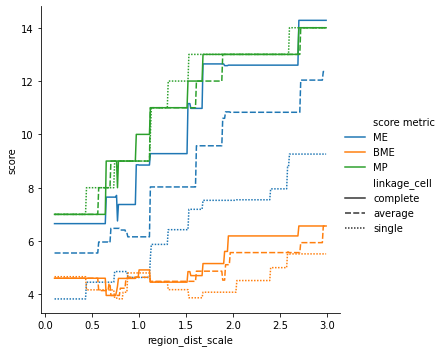

In [16]:
plot = sns.relplot(data=all_scores, x='region_dist_scale', y='score', hue='score metric', kind='line', style='linkage_cell')
plot.savefig('M_score_v_region-dist-scale_varying_ct-linkage_coarse.pdf')

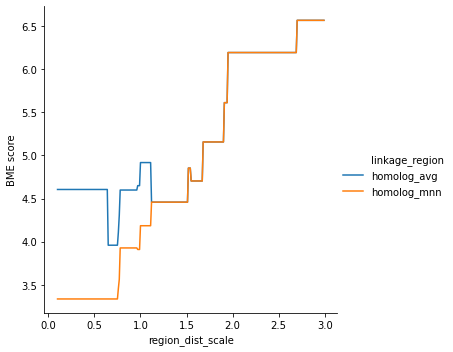

In [10]:
plot = sns.relplot(data=all_scores[all_scores['score metric'] == 'BME'], x='region_dist_scale', y='score', hue='linkage_region', kind='line')
plot.set(ylabel='BME score')
plot.savefig('M_BME-score_v_region-dist-scale_varying_r-linkage_coarse.pdf')

100%|██████████| 870/870 [00:49<00:00, 17.57it/s]


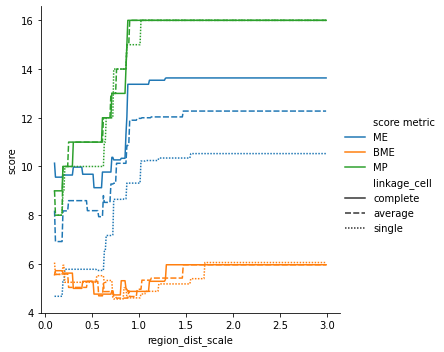

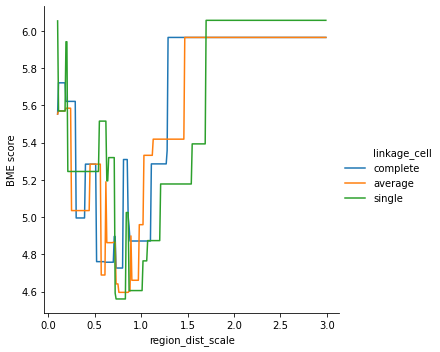

In [21]:
data = CTDataLoader('chicken')
agglomerate = BatchAgglomerate3D(
    cell_type_affinity=[spearmanr_connectivity],
    linkage_cell=['complete', 'average', 'single'],
    linkage_region=['homolog_avg'],
    max_region_diff=[1],
    region_dist_scale=np.arange(0.1, 3, 0.01),
    verbose=False
)

agglomerate.agglomerate(data)
all_scores = agglomerate.get_all_scores()
plot = sns.relplot(data=all_scores, x='region_dist_scale', y='score', hue='score metric', kind='line', style='linkage_cell')
plot.savefig('C_score_v_region-dist-scale_varying_ct-linkage_coarse.pdf')
plot = sns.relplot(data=all_scores[all_scores['score metric'] == 'BME'], x='region_dist_scale', y='score', hue='linkage_cell', kind='line')
plot.set(ylabel='BME score')
plot.savefig('C_BME-score_v_region-dist-scale_varying_ct-linkage_coarse.pdf')

In [3]:
data = CTDataLoader('mouse')
agglomerate = BatchAgglomerate3D(
    cell_type_affinity=[spearmanr_connectivity],
    linkage_cell=['complete'],
    linkage_region=['homolog_avg'],
    max_region_diff=[0, 1],
    region_dist_scale=np.arange(0.1, 1.5, 0.005),
    verbose=False
)

agglomerate.agglomerate(data)
M_all_scores = agglomerate.get_all_scores()

100%|██████████| 560/560 [00:36<00:00, 15.22it/s]


In [3]:
plot = sns.relplot(data=all_scores, x='region_dist_scale', y='score', hue='score metric', kind='line', style='max_region_diff')
plot.savefig('score_v_region-dist-scale_fine.pdf')

NameError: name 'all_scores' is not defined

In [4]:
data = CTDataLoader('chicken')
agglomerate = BatchAgglomerate3D(
    cell_type_affinity=[spearmanr_connectivity],
    linkage_cell=['complete'],
    linkage_region=['homolog_avg'],
    max_region_diff=[0, 1],
    region_dist_scale=np.arange(0.1, 1.5, 0.005),
    verbose=False
)

agglomerate.agglomerate(data)
C_all_scores = agglomerate.get_all_scores()

100%|██████████| 560/560 [00:46<00:00, 12.12it/s]


In [ ]:
plot = sns.relplot(data=C_all_scores, x='region_dist_scale', y='score', hue='score metric', kind='line', style='max_region_diff')
plot.set(title='Chicken')
plot.savefig('C_score_v_region-dist-scale_fine.pdf')

In [ ]:
plot = sns.relplot(data=C_all_scores[C_all_scores['score metric'] == 'BME'], x='region_dist_scale', y='score', hue='score metric', kind='line', style='max_region_diff')
plot.set(title='Chicken')
plot.savefig('C_BME_score_v_region-dist-scale_fine.pdf')

In [5]:
M_all_scores['animal'] = ['mouse'] * len(M_all_scores.index)

In [6]:
C_all_scores['animal'] = ['chicken'] * len(C_all_scores.index)

In [7]:
MC_all_scores = pd.concat([M_all_scores, C_all_scores])
MC_all_scores_BME = MC_all_scores.loc[MC_all_scores['score metric'] == 'BME']
M_all_scores_BME = M_all_scores.loc[M_all_scores['score metric'] == 'BME']
C_all_scores_BME = C_all_scores.loc[C_all_scores['score metric'] == 'BME']

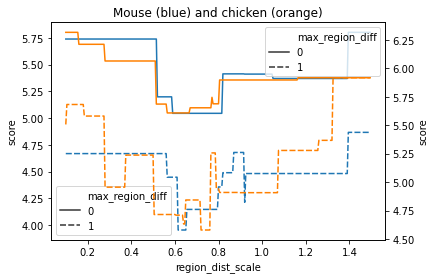

In [14]:
plot = sns.lineplot(data=M_all_scores_BME, x='region_dist_scale', y='score', style='max_region_diff')
ax2 = plot.twinx()
plot = sns.lineplot(data=C_all_scores_BME, x='region_dist_scale', y='score', style='max_region_diff', ax=ax2, color=(1, .5, 0))
plot.set(title='Mouse (blue) and chicken (orange)')
plt.savefig('MC_BME_score_v_region-dist-scale.pdf')

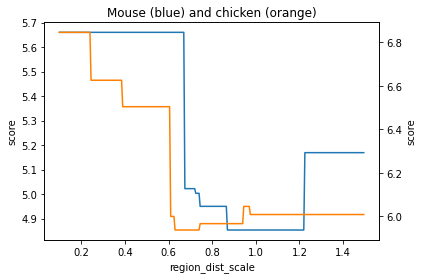

In [10]:
plot = sns.lineplot(data=M_all_scores_BME[M_all_scores_BME['max_region_diff'] == 0], x='region_dist_scale', y='score')
ax2 = plot.twinx()
plot = sns.lineplot(data=C_all_scores_BME[C_all_scores_BME['max_region_diff'] == 0], x='region_dist_scale', y='score', ax=ax2, color=(1, .5, 0))
plot.set(title='Mouse (blue) and chicken (orange)')
plt.savefig('MC_BME_1-max-region-diff_score_v_region-dist-scale.pdf')